In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import precision_recall_curve

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt', sep='\s+', 
           names = pd.read_csv('./UCI HAR Dataset/features.txt', sep = '\s+', header = None)[1], header = None)

In [19]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [28]:
y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', sep='\s+', 
           names = ["activity"], header = None)
y_test.head()

,activity
0,5
1,5
2,5
3,5
4,5


In [29]:
X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt', sep='\s+', 
           names = pd.read_csv('./UCI HAR Dataset/features.txt', sep = '\s+', header = None)[1], header = None)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [58]:
Cols = list(X_test.columns)
for i,item in enumerate(X_test.columns):
    if item in X_test.columns[:i]: Cols[i] = "toDROP"
X_test.columns = Cols
X_test = X_test.drop("toDROP",1)

In [31]:
y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt', sep='\s+', 
           names = ["activity"], header = None)
y_train.head()

,activity
0,5
1,5
2,5
3,5
4,5


In [60]:
rfc = RandomForestClassifier(n_estimators=500)

In [62]:
rfc.fit(X_train, y_train)

/Users/danielstallworth/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
print sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X_train), 
             reverse=True)[:10]

[(0.0325, 'tGravityAcc-mean()-X'), (0.0305, 'tGravityAcc-min()-X'), (0.0304, 'tGravityAcc-mean()-Y'), (0.0276, 'angle(X,gravityMean)'), (0.026, 'tGravityAcc-energy()-X'), (0.0258, 'tGravityAcc-min()-Y'), (0.0256, 'angle(Y,gravityMean)'), (0.024, 'tGravityAcc-max()-Y'), (0.0225, 'tGravityAcc-max()-X'), (0.0172, 'tGravityAcc-energy()-Y')]


In [68]:
rfc.score(X_test, y_test)

0.92297251442144557

In [73]:
decision_values = rfc.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, decision_values)

plt.plot(recall, precision)
plt.show()

ValueError: bad input shape (2947, 6)

ValueError: setting an array element with a sequence.

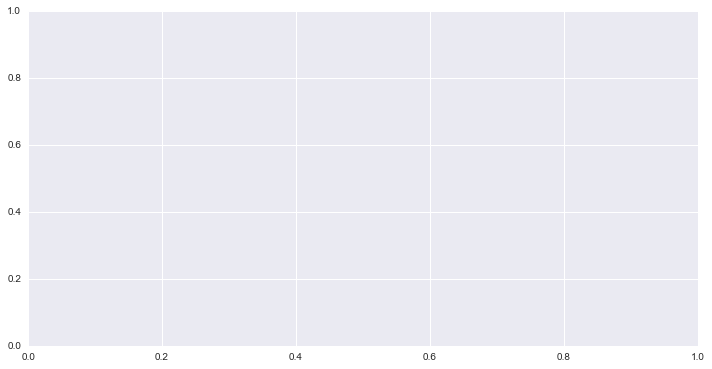

In [69]:
act = pd.concat([X_train, y_train], 1).groupby('activity')
act.head()
plt.figure(figsize=(12,6))
for x in act:
    sns.distplot(act['fBodyAccMag-mean()'], label = 'mean')
# sns.distplot(act['fBodyAccMag-std()'],label = 'std')
# sns.distplot(act['fBodyAccMag-mad()'], label = 'mad')
# sns.distplot(act['fBodyAccMag-max()'], label = 'max')
# sns.distplot(act['fBodyAccMag-min()'], label = 'min')
# sns.distplot(act['fBodyAccMag-sma()'], label = 'sma')
# plt.legend()